In [1]:
from astropy.io import fits,ascii
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os
import sys
import warnings
warnings.filterwarnings('ignore')
from astropy.table import Table
from astropy.coordinates import SkyCoord
from scipy.stats import ks_2samp
from astropy import units as u

In [2]:
homedir = os.getenv("HOME")
sys.path.append(homedir+'/github/APPSS/')
from a100sdss import ks, anderson
sys.path.append(homedir+'/github/LCS/python/Python3/')
from LCScommon import *

Running on coma


In [3]:
plotdir = homedir+'/research/LCS/plots/'


# Write Out Files for Benedetta

* GSWLC, LCS core, LCS infall
* B/T < 0.3

In [61]:
os.chdir(homedir+'/research/LCS/tables/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13.5-2020Nov11-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433


In [62]:
# create flag to select gsw sample
gflag = (b.gsw.cat['logMstar'] > b.masscut) & (b.gsw.ssfr > b.ssfrcut)
# create flag to select LCS core sample
cflag = b.lcs.cat['membflag'] &  (b.lcs.cat['logMstar']> b.masscut)  & (b.lcs.ssfr > b.ssfrcut)
# create flag to select LCS infall sample
iflag = (~b.lcs.cat['membflag'])  & (b.lcs.cat['DELTA_V'] < 3.) &  (b.lcs.cat['logMstar']> b.masscut)  & (b.lcs.ssfr > b.ssfrcut)

In [63]:
gtab = Table(b.gsw.cat)['logMstar','logSFR'][gflag]
ctab = Table(b.lcs.cat)['logMstar','logSFR'][cflag]
itab = Table(b.lcs.cat)['logMstar','logSFR'][iflag]

In [64]:
gtab.write('gswcl_sfr_mstar_13_5_2020Nov11.fits',format='fits',overwrite=True)
ctab.write('lcs_core_sfr_mstar_2020Nov11.fits',format='fits',overwrite=True)
itab.write('lcs_infall_sfr_mstar_2020Nov11.fits',format='fits',overwrite=True)

# Phase Space Diagram

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
got sb flag
1334 1334 1334 1334


No handles with labels found to put in legend.


<Figure size 489.6x360 with 0 Axes>

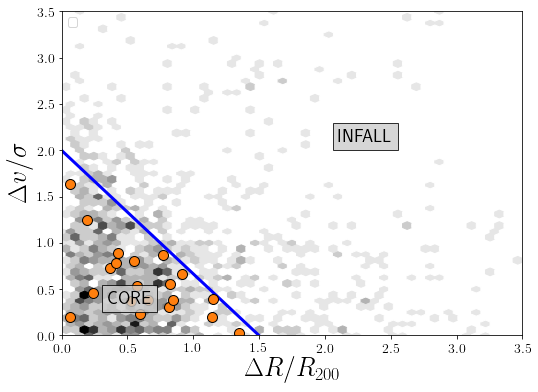

In [94]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py
figname1 = homedir+'/research/LCS/plots/lcs-dvdr.png'
figname2 = homedir+'/research/LCS/plots/lcs-dvdr.pdf'
lcs.plot_dvdr(figname1=figname1,figname2=figname2)

In [92]:
sum(lcs.sampleflag & lcs.lowsfr_flag & lcs.membflag)

20

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
got sb flag
1334 1334 1334 1334
just checking ... 210 40
0.011754403
0.062494926
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.12
p-vale = 6.823e-01 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =  -0.61
p-vale = 0.66611 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.08
p-vale = 9.578e-01 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =  -0.80
p-vale = 0.81218 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

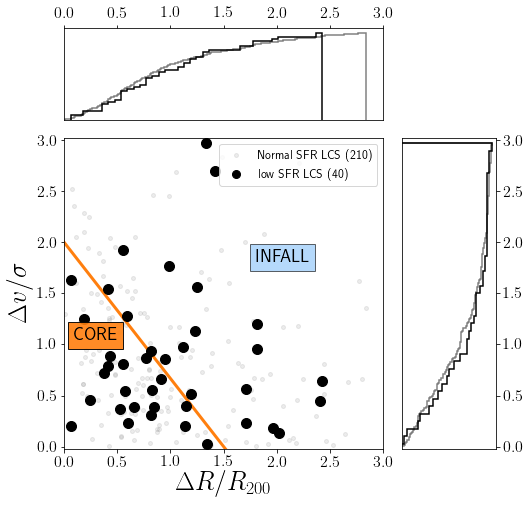

In [124]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py
figname1 = homedir+'/research/LCS/plots/lcs-dvdr-sfgals.png'
figname2 = homedir+'/research/LCS/plots/lcs-dvdr-sfgals.pdf'
lcs.plot_dvdr_sfgals(figname1=figname1,figname2=figname2)

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
got sb flag
1334 1334 1334 1334
just checking ... 100 20
0.07303849
0.41271406
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.11
p-vale = 9.803e-01 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =  -0.76
p-vale = 0.77766 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.11
p-vale = 9.803e-01 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =  -0.83
p-vale = 0.84048 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

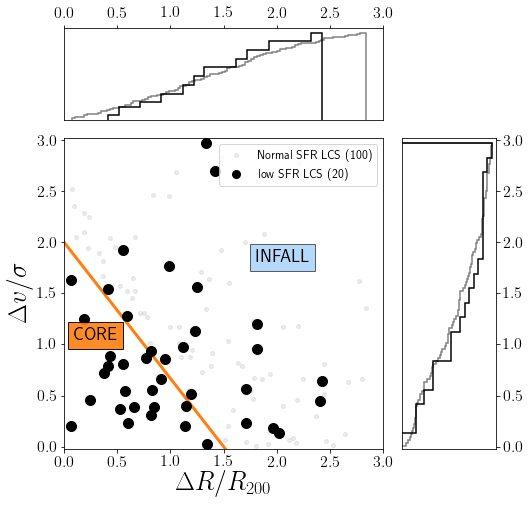

In [123]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py
figname1 = homedir+'/research/LCS/plots/lcs-dvdr-sfgals.png'
figname2 = homedir+'/research/LCS/plots/lcs-dvdr-sfgals.pdf'
lcs.plot_dvdr_sfgals(figname1=figname1,figname2=figname2)

# Compare B/T distribution of core and infall galaxies #

* need to see if BT distribution is similar
* if not, we will need to cut on BT for the simulation
* otherwise we will conflate multiple factors


CONCLUSION
* B/T of core/infall are significantly different. pvalue = 1.6e-10 
* after cutting B/T < 0.3, the difference is much smaller.  pvalue = 0.015

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
1181 1181 1181 1181
comparing BT: Core vs Infall
Ks_2sampResult(statistic=0.21, pvalue=0.010414739186553779)
comparing BT: Core vs Field
Ks_2sampResult(statistic=0.2189188410805829, pvalue=5.4915532035952395e-06)
comparing BT: Field vs Infall
Ks_2sampResult(statistic=0.12374805598755834, pvalue=0.09574692336643853)
number in core and infall = 135, 100


<Figure size 489.6x360 with 0 Axes>

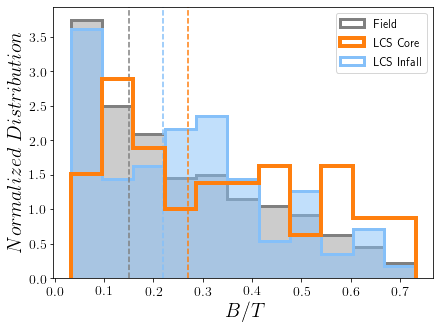

In [192]:
os.chdir(homedir+'/research/LCS/plots/')
btmax=.7
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7 --cutBT --BT .7
outfile1 = homedir+'/research/LCS/plots/BThist-btcut1.pdf'
outfile2 = homedir+'/research/LCS/plots/BThist-btcut1.png'
b.compare_BT(nbins=12,xmax=btmax)#outfile1=outfile1,outfile2=outfile2,nbins=12)
plt.savefig(outfile1)
plt.savefig(outfile2)

### Compare morphology and color for Field and LCS

* Look at galaxies with normal SFR and low SFRs separately
  * top column is normal SFR
  * bottom column is low SFR

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
got sb flag
1334 1334 1334 1334


<Figure size 489.6x360 with 0 Axes>

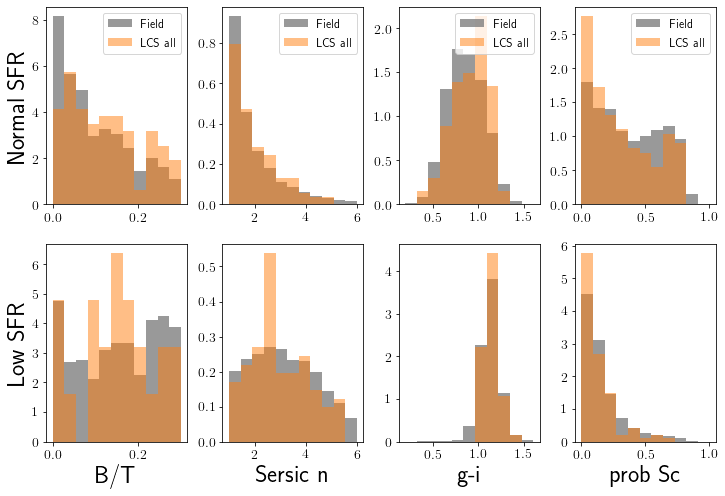

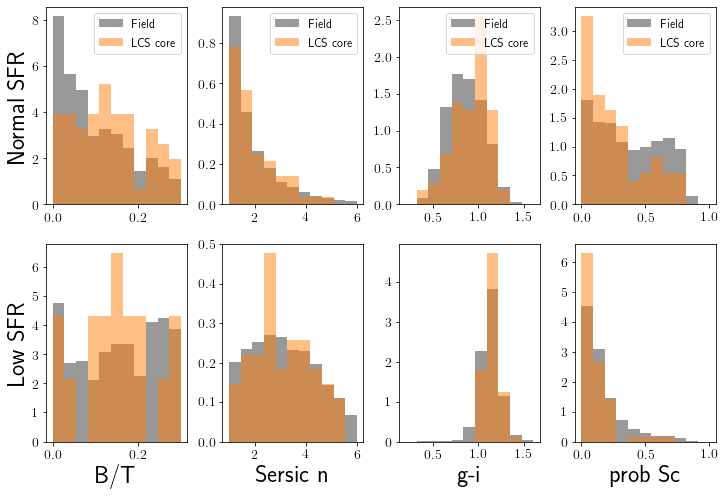

In [6]:
os.chdir(homedir+'/research/LCS/plots/')
btmax=.3
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7 --BT .3

b.compare_morph(nbins=12,xmax=btmax,coreonly=False)#outfile1=outfile1,outfile2=outfile2,nbins=12)
outfile1 = homedir+'/research/LCS/plots/morphhist-lcsall-btcut1.pdf'
outfile2 = homedir+'/research/LCS/plots/morphhist-lcsall-btcut1.png'
plt.savefig(outfile1)
plt.savefig(outfile2)

# repeat but compare field with lcs core only
b.compare_morph(nbins=12,xmax=btmax,coreonly=True)
outfile1 = homedir+'/research/LCS/plots/morphhist-lcscore-btcut1.pdf'
outfile2 = homedir+'/research/LCS/plots/morphhist-lcscore-btcut1.png'
plt.savefig(outfile1)
plt.savefig(outfile2)

In [78]:
# compare mass distribution of LCS normal and suppressed sf

var = b.lcs.cat['logMstar']
lcsflag = b.lcs.membflag | b.lcs.infallflag
flag1 = lcsflag & b.lcs.lowsfr_flag & b.lcs_mass_sfr_flag
flag2 = lcsflag & ~b.lcs.lowsfr_flag & b.lcs_mass_sfr_flag
t = ks_2samp(var[flag1],var[flag2])
print('LCS mass, normal and suppressed')
print(t)
print()
print('#############################')
print()

var = b.gsw.cat['logMstar']
print('GSW mass, normal and suppressed')
flag1 =  b.gsw.lowsfr_flag & b.gsw_mass_sfr_flag
flag2 =  ~b.gsw.lowsfr_flag & b.gsw_mass_sfr_flag
t = ks_2samp(var[flag1],var[flag2])
print(t)

LCS mass, normal and suppressed
Ks_2sampResult(statistic=0.2782608695652174, pvalue=0.09002694655722543)

#############################

GSW mass, normal and suppressed
Ks_2sampResult(statistic=0.10762314806049621, pvalue=5.120428339258362e-06)


outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
got sb flag
1334 1334 1334 1334
######################################################
comparing mass distribution of normal SFR galaxies
Ks_2sampResult(statistic=0.10165889104496101, pvalue=0.07822351711639593)
######################################################
comparing mass distribution of low SFR galaxies
Ks_2sampResult(statistic=0.2028167914767775, pvalue=0.0004986624979973486)


<Figure size 489.6x360 with 0 Axes>

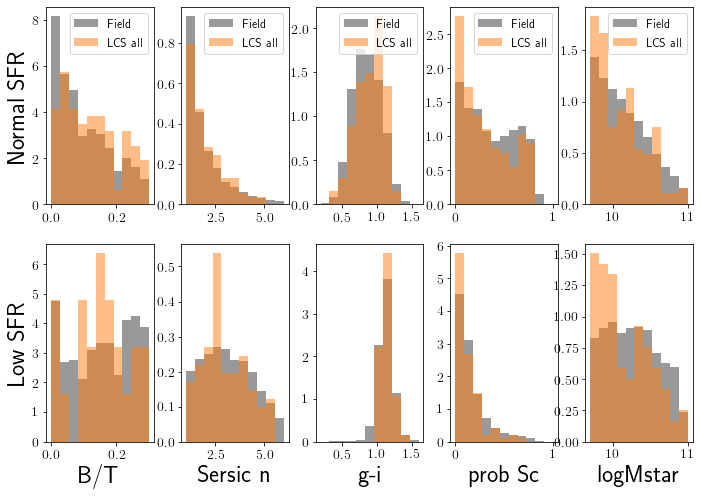

######################################################
comparing mass distribution of normal SFR galaxies
Ks_2sampResult(statistic=0.14354701893724509, pvalue=0.0726914138611408)
######################################################
comparing mass distribution of low SFR galaxies
Ks_2sampResult(statistic=0.21682511325208959, pvalue=0.00276799666615013)


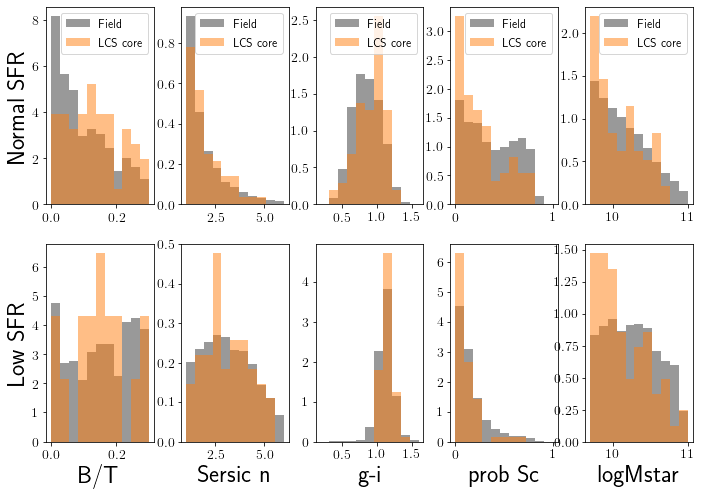

In [74]:
os.chdir(homedir+'/research/LCS/plots/')
btmax=.3
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7 --BT .3

b.compare_morph(nbins=12,xmax=btmax,coreonly=False)#outfile1=outfile1,outfile2=outfile2,nbins=12)
outfile1 = homedir+'/research/LCS/plots/prop-lowsfr-lcsall-btcut1.pdf'
outfile2 = homedir+'/research/LCS/plots/prop-lowsfr-lcsall-btcut1.png'
plt.savefig(outfile1)
plt.savefig(outfile2)

pause(1)
# repeat but compare field with lcs core only
b.compare_morph(nbins=12,xmax=btmax,coreonly=True)
outfile1 = homedir+'/research/LCS/plots/prop-lowsfr-lcscore-btcut1.pdf'
outfile2 = homedir+'/research/LCS/plots/prop-lowsfr-lcscore-btcut1.png'
plt.savefig(outfile1)
plt.savefig(outfile2)

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
got sb flag
1334 1334 1334 1334
#######################################
comparing low SFR and mass-matched normal SFR
Ks_2sampResult(statistic=0.47163912460920054, pvalue=1.672351394579987e-225)
#######################################
comparing normal SFR and normal SFR mass-matched to low SFR
Ks_2sampResult(statistic=0.03343939688611375, pvalue=0.03039040395934264)


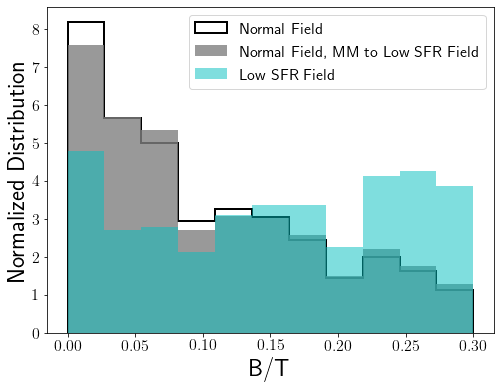

In [102]:
# compare BT of low SFR field galaxies with BT distribution of mass-matched normal SF field galaxies 
os.chdir(homedir+'/research/LCS/plots/')
btmax=.3
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7 --BT .3

b.compare_BT_lowsfr_field(nbins=12)#outfile1=outfile1,outfile2=outfile2,nbins=12)
outfile1 = homedir+'/research/LCS/plots/morphhist-field-normal-lowsfr.pdf'
outfile2 = homedir+'/research/LCS/plots/morphhist-field-normal-lowsfr.png'
plt.savefig(outfile1)
plt.savefig(outfile2)

## Repeat for low SFR core galaxies

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
got sb flag
1334 1334 1334 1334
#######################################
comparing low SFR and mass-matched normal SFR
Ks_2sampResult(statistic=0.5285714285714286, pvalue=2.6945092186973132e-09)


<Figure size 489.6x360 with 0 Axes>

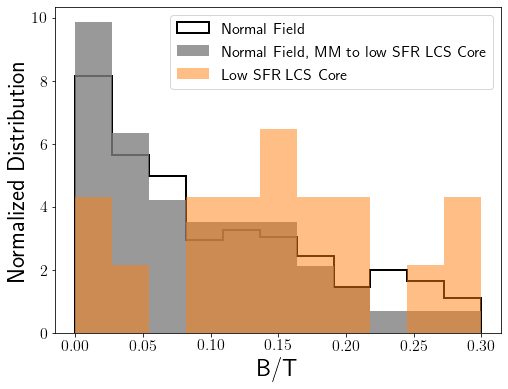

In [125]:
# compare BT of low SFR field galaxies with BT distribution of mass-matched normal SF field galaxies 
os.chdir(homedir+'/research/LCS/plots/')
btmax=.3
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7 --BT .3

b.compare_BT_lowsfr_lcs_massmatch(nbins=12,coreonly=True)#outfile1=outfile1,outfile2=outfile2,nbins=12)
outfile1 = homedir+'/research/LCS/plots/morphhist-lcscore-normal-lowsfr.pdf'
outfile2 = homedir+'/research/LCS/plots/morphhist-lcscore-normal-lowsfr.png'
plt.savefig(outfile1)
plt.savefig(outfile2)

This shows that even in the field, the suppressed galaxies have higher B/T.  This is not due a difference in mass distribution.  The solid gray and orange histograms have a matched mass distribution. Compare with literature - what is transforming B/T of field galaxies as they quench?  How is SFR suppressing linked to morphological evolution?  Must be change in B/T during SFR suppression.

Moving to role of environment.

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap.fits
got sb flag
1334 1334 1334 1334
###################################################################
comparing LCS low SFR and mass-matched field low SFR: B/T
statistic=0.09, pvalue=3.79e-01

###################################################################
comparing LCS low SFR and mass-matched field low SFR: Sersic n
statistic=0.08, pvalue=4.58e-01

###################################################################
comparing LCS low SFR and mass-matched field low SFR: g-i
statistic=0.13, pvalue=7.32e-02

###################################################################
comparing LCS low SFR and mass-matched field low SFR: prob Sc
statistic=0.19, pvalue=1.85e-03



<Figure size 489.6x360 with 0 Axes>

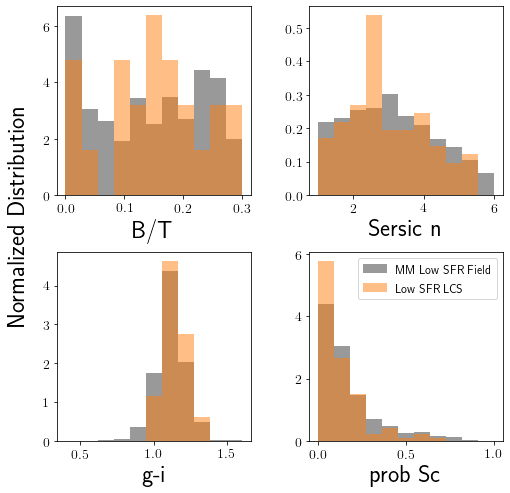

###################################################################
comparing LCS low SFR and mass-matched field low SFR: B/T
statistic=0.08, pvalue=7.18e-01

###################################################################
comparing LCS low SFR and mass-matched field low SFR: Sersic n
statistic=0.13, pvalue=1.71e-01

###################################################################
comparing LCS low SFR and mass-matched field low SFR: g-i
statistic=0.19, pvalue=1.09e-02

###################################################################
comparing LCS low SFR and mass-matched field low SFR: prob Sc
statistic=0.21, pvalue=4.17e-03



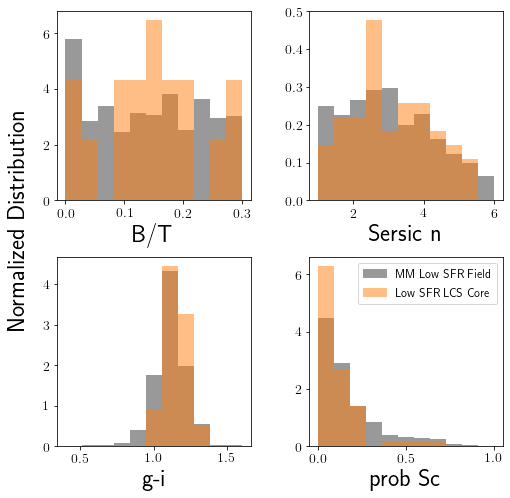

In [61]:
# compare BT of low SFR field galaxies with BT distribution of mass-matched normal SF field galaxies 
os.chdir(homedir+'/research/LCS/plots/')
btmax=.3
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7 --BT .3

b.compare_BT_lowsfr_field_core(nbins=12,coreonly=False)
outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcsall-mmfield-btcut1.pdf'
outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcsall-mmfield-btcut1.png'
plt.savefig(outfile1)
plt.savefig(outfile2)
pause(1)
b.compare_BT_lowsfr_field_core(nbins=12,coreonly=True)
outfile1 = homedir+'/research/LCS/plots/lowsfr-prop-lcscore-mmfield-btcut1.pdf'
outfile2 = homedir+'/research/LCS/plots/lowsfr-prop-lcscore-mmfield-btcut1.png'
plt.savefig(outfile1)
plt.savefig(outfile2)

### Compare B/T distribution of Core, Infall, Field

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
1198 1198 1198 1198
comparing BT: Core vs Infall
Ks_2sampResult(statistic=0.21, pvalue=0.010414739186553779)
comparing BT: Core vs Field
Ks_2sampResult(statistic=0.2189188410805829, pvalue=5.4915532035952395e-06)
comparing BT: Field vs Infall
Ks_2sampResult(statistic=0.12374805598755834, pvalue=0.09574692336643853)
number in core and infall = 135, 100


<Figure size 489.6x360 with 0 Axes>

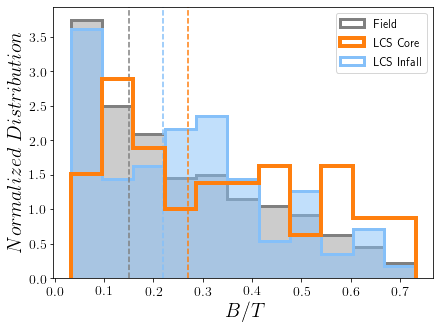

In [185]:
os.chdir(homedir+'/research/LCS/plots/')
btmax=.7
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7 --cutBT --BT .7
outfile1 = homedir+'/research/LCS/plots/BThist-btcut1.pdf'
outfile2 = homedir+'/research/LCS/plots/BThist-btcut1.png'
b.compare_BT(nbins=12,xmax=btmax)#outfile1=outfile1,outfile2=outfile2,nbins=12)
plt.savefig(outfile1)
plt.savefig(outfile2)

## Compare $\Delta$SFR as a function of BT

* core has lower $\Delta$SFR at all BT
* we then looked at galaxies with low $\Delta$SFR and high B/T
  * visual inspection shows there are some ellipticals contaminating
* we try to cut on nsersic=2, and the difference between the core and field still persists for B/T < 0.2 galaxies.   The infall is too noisy when we cut on n=2, so that it overlaps both the field and core samples.

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550
#########################
Without Sersic cut
#########################

Field
r=-0.0968, pvalue=1.165e-20

LCS Core
r=-0.0619, pvalue=6.006e-01

LCS Infall
r=-0.0492, pvalue=6.993e-01

 Combined Samples: Spearman Rank


<Figure size 489.6x360 with 0 Axes>

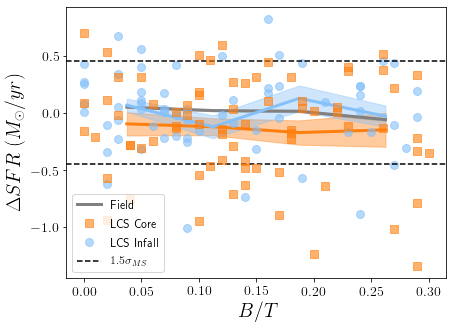

#########################
Applying Sersic n=2 cut
#########################

Field
r=-0.0790, pvalue=3.240e-13

LCS Core
r=0.0651, pvalue=6.034e-01

LCS Infall
r=0.0048, pvalue=9.730e-01

 Combined Samples: Spearman Rank


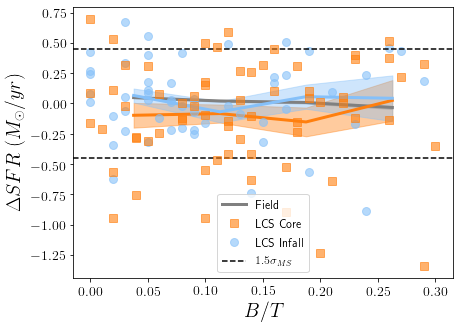

In [73]:
os.chdir(homedir+'/research/LCS/plots/')
btmax=.3
nbins=5
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7 --BT .3

print('#########################')
print('Without Sersic cut')
print('#########################')
xvars,yvars = b.plot_dsfr_BT(nbins=nbins,xmax=btmax,writefiles=True,nsersic_cut=10)#outfile1=outfile1,outfile2=outfile2,nbins=12)
outfile1 = homedir+'/research/LCS/plots/dsfr-BT-btcut1.pdf'
outfile2 = homedir+'/research/LCS/plots/dsfr-BT-btcut1.png'
plt.savefig(outfile1)
plt.savefig(outfile2)

pause(1)
print('#########################')
print('Applying Sersic n=2 cut')
print('#########################')
xvars,yvars = b.plot_dsfr_BT(nbins=nbins,xmax=btmax,writefiles=True,nsersic_cut=2)#outfile1=outfile1,outfile2=outfile2,nbins=12)
outfile1 = homedir+'/research/LCS/plots/dsfr-BT-btcut1-nsersic2.pdf'
outfile2 = homedir+'/research/LCS/plots/dsfr-BT-btcut1-nsersic2.png'
plt.savefig(outfile1)
plt.savefig(outfile2)

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
1198 1198 1198 1198

Field
r=-0.2370, pvalue=1.304e-163

LCS Core
r=-0.4528, pvalue=3.521e-08

LCS Infall
r=-0.4646, pvalue=1.121e-06

 Combined Samples: Spearman Rank


<Figure size 489.6x360 with 0 Axes>

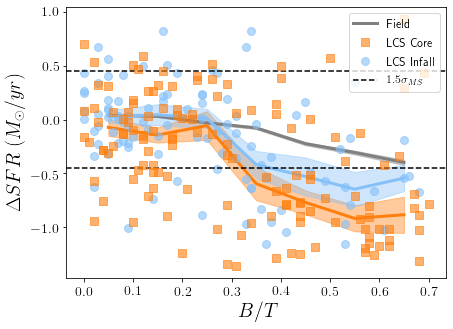

In [191]:
os.chdir(homedir+'/research/LCS/plots/')
btmax=.7
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7 --BT .7
outfile1 = homedir+'/research/LCS/plots/dsfr-BT-btcut1.pdf'
outfile2 = homedir+'/research/LCS/plots/dsfr-BT-btcut1.png'
xvars,yvars = b.plot_dsfr_BT(nbins=8,xmax=btmax,writefiles=True,nsersic_cut=10)#outfile1=outfile1,outfile2=outfile2,nbins=12)
plt.savefig(outfile1)
plt.savefig(outfile2)

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
1198 1198 1198 1198
getting legacy images for  44  galaxies


<Figure size 489.6x360 with 0 Axes>

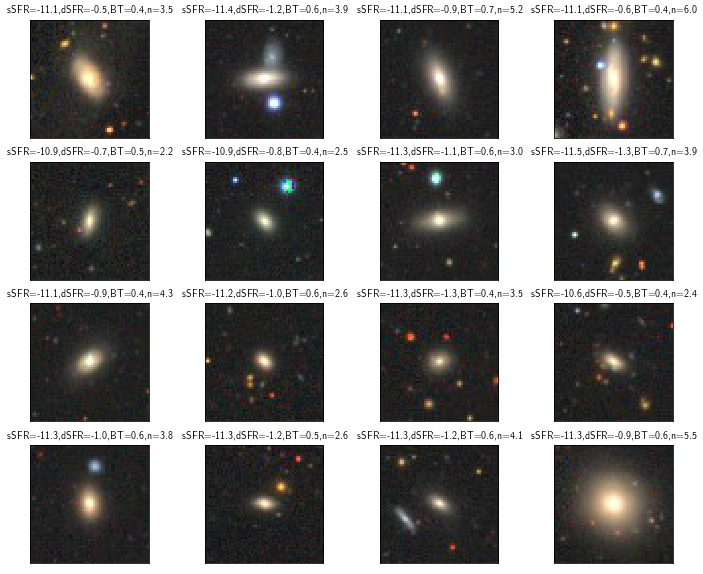

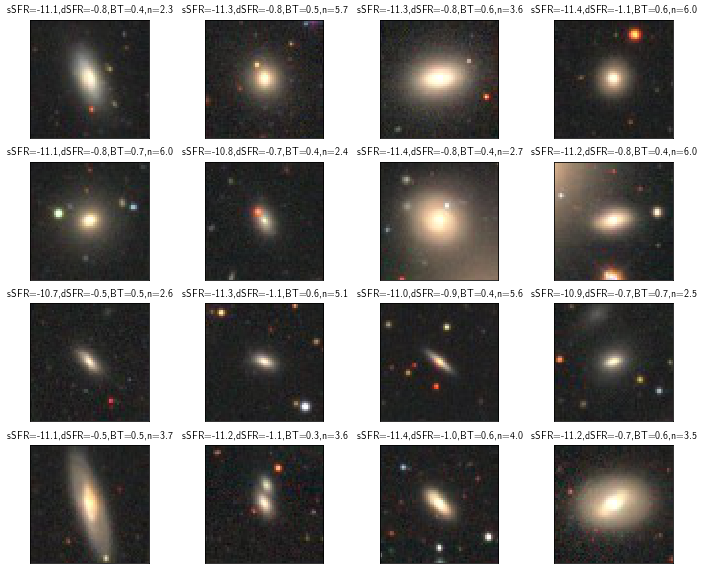

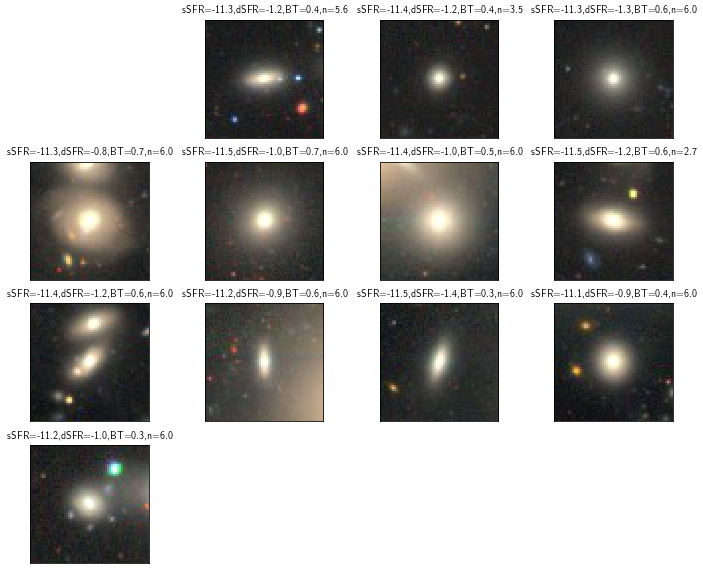

In [160]:
os.chdir(homedir+'/research/LCS/plots/')
btmax=.7
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7 --BT .7
b.core_getlegacy()

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
1198 1198 1198 1198
getting legacy images for  21  galaxies


<Figure size 489.6x360 with 0 Axes>

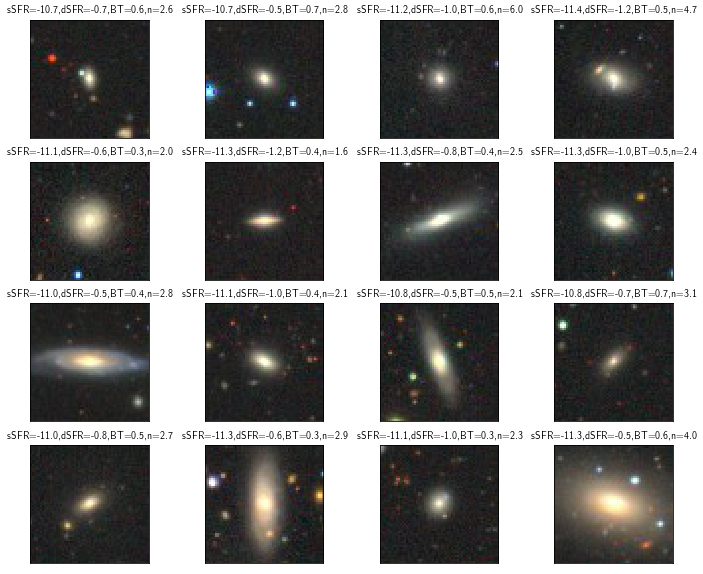

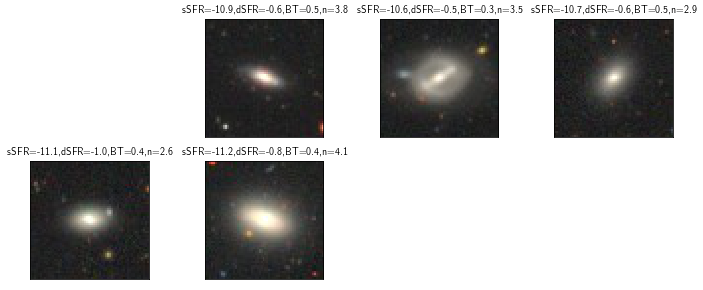

In [159]:
os.chdir(homedir+'/research/LCS/plots/')
btmax=.7
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7 --BT .7
b.infall_getlegacy()

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
1198 1198 1198 1198
getting legacy images for  21  galaxies


<Figure size 489.6x360 with 0 Axes>

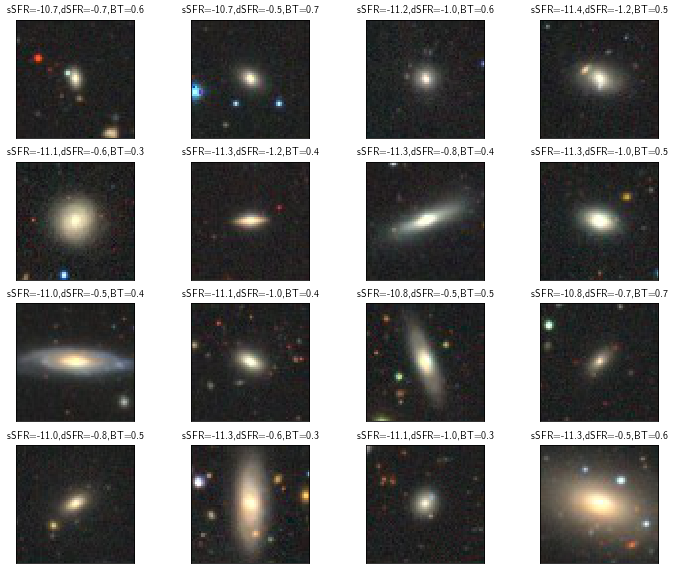

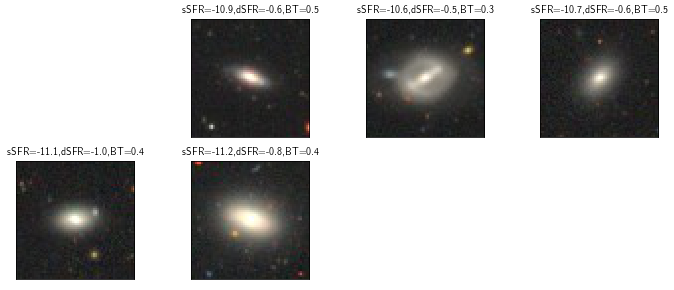

In [157]:
os.chdir(homedir+'/research/LCS/plots/')
btmax=.7
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7 --BT .7
b.infall_getlegacy()

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550
0.22972972972972974 [-0.04510345  0.05231067]
0.09375 [-0.03044     0.04294002]
0.06430659304969145 [-0.00250542  0.00259975]
(2,)


<Figure size 489.6x360 with 0 Axes>

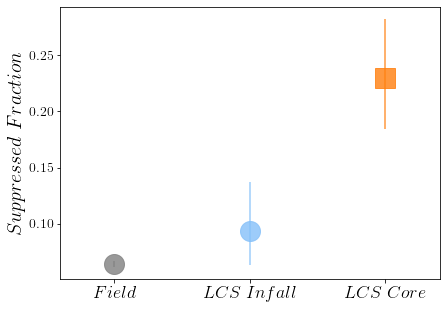

In [126]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
outfile1 = homedir+'/research/LCS/plots/fsuppressed-btcut1.pdf'
outfile2 = homedir+'/research/LCS/plots/fsuppressed-btcut1.png'
b.plot_frac_suppressed()#outfile1=outfile1,outfile2=outfile2,nbins=12)
plt.savefig(outfile1)
plt.savefig(outfile2)

# Comparison of LCS with GSWLC #

- The GSWLC provides a better comparison sample for us.
- I matched to GSWLC-X2 - used 5 arcsecond radius.  found 1496 matches.
  - I didn't note how I did the match.  I don't see any python programs, so I probably used topcat.
  - redoing on 5/29/20
  - matching LCS_all_size_KE_SFR.fits with GSWLC-X2-LCS-Zoverlap.dat
  - matching NSA RA,DEC with GSWLC RA,DEC
    - 5 arcsec offset
    - best match, symmetric
    - 1 and 2
    - found 1477 pairs (~20 fewer than last time :( )
   - 10 arcsec search radius
     - 1487 pairs
   - 15 arcsec search radius
     - 1490 pairs
- we can use the GSWLC SFRs and Stellar masses for both the LCS and comparison galaxies.  This removes significant uncertainty associated with mixing methods for calculating SFR and Mstar.

- redshift limit $0.01 < z < 0.03$
- mag limit r petrosian $r = 18.0$
- main sequence: $log10(sSFR) > -11$
- explanation of GSWLC-2 catalog http://pages.iu.edu/~salims/gswlc/table2.pdf

**Stellar Mass Limit**

- convert r to Mr at maximum distance of LCS ($z=.0433$)
- then plot Mstar vs Mr, and estimate Mstar limit from Mr limit

**SFR Limit**
- Salim+2018 use $log10(sSFR) > -11$ to select star-forming galaxies
- $log10(sSFR) < -11.5$ should be considered upper limits GSWLC-A (Salim+2018, pg 11, col2)
  - we use this as our sSFR limit
- for SF galaxies, SFR errors are typically below 0.1dex

**Environment Catalogs**
- yang+07
- tempel+2012 - http://www.aai.ee/~elmo/dr8groups/readme.txt
- decarvalha+2017

# SFR - Mstar: no B/T cut #

repeating above three plots, but for SFR vs Mstar

### SFR-M*: LCS core vs GSWLC field, no BT cut ###

* SFRs are VERY different
* stellar masses are different

**need to make a mass-matched sample?**
as a counter point, the difference in stellar mass distributions are due to the 
GSWLC sample having lower mass galaxies. This would increase the fraction of low-SFR galaxies in the GSWLC sample, yet the LCS core galaxies have even lower SFRs. 

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
number in lcs sample =  153
number in gsw sample =  4459
just checking ... 4455 153
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.13
p-vale = 1.242e-02 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.30
p-vale = 4.644e-12 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

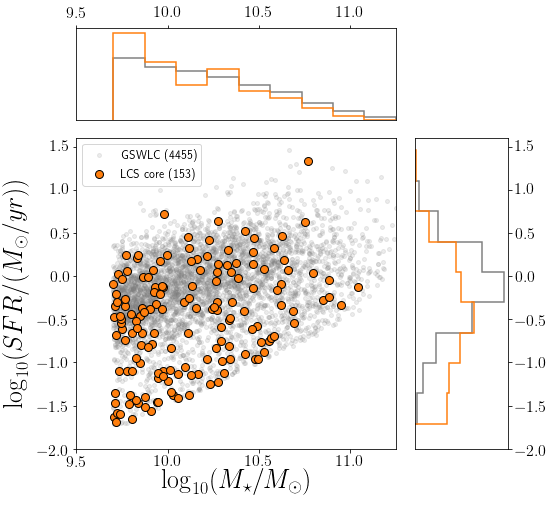

In [160]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
flag = b.lcs.cat['membflag'] 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar.png'
b.plot_sfr_mstar(lcsflag=flag,lcsmemb=True,outfile1=outfile1,outfile2=outfile2,massmatch=False)

### mass-matched sample ###

### LCS Core vs GSWLC, no BT cut, mass matching ###

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
number in lcs sample =  153
number in gsw sample =  4459
just checking ... 3060 153
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.05
p-vale = 8.087e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.27
p-vale = 3.927e-10 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

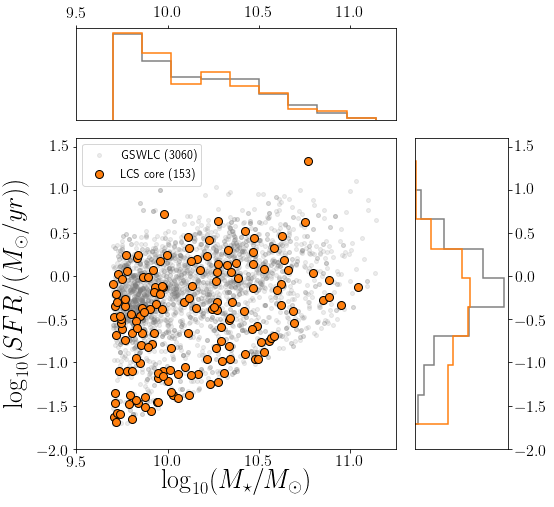

In [161]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
flag = b.lcs.cat['membflag'] 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar.png'
b.plot_sfr_mstar(lcsflag=flag,lcsmemb=True,outfile1=outfile1,outfile2=outfile2,massmatch=True)

In [162]:
sum(b.lcs.cat['sampleflag'] & b.lcs.cat['membflag'])

91

### SFR-M*: LCS infall vs GSWLC, no BT cut ###

* stellar masses are very diff (more low-mass galaxies in gswlc)
* SFRs are not different

**again, need mass-matched sample**

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
number in lcs sample =  116
number in gsw sample =  4459
just checking ... 4455 116
9.701
9.711
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.10
p-vale = 1.566e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.22
p-vale = 4.359e-05 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

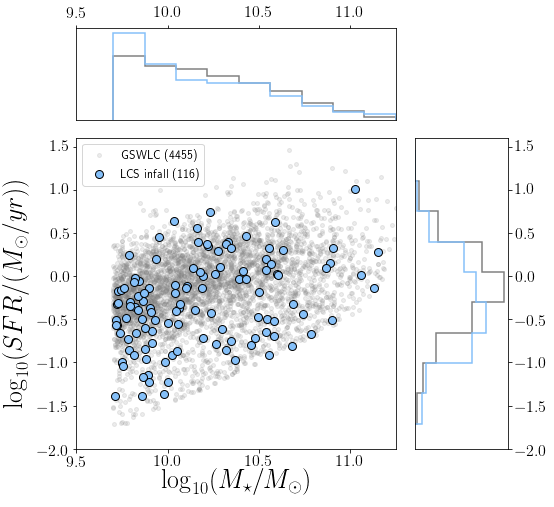

In [163]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
flag = ~b.lcs.cat['membflag'] & (b.lcs.cat['DELTA_V'] < 3.)
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar.png'
b.plot_sfr_mstar(lcsflag=flag,lcsinfall=True,label='LCS infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,massmatch=False)

### SFR-M*: LCS infall vs GSWLC, no BT cut, with mass matching ###

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
number in lcs sample =  116
number in gsw sample =  4459
just checking ... 2316 116
9.701
9.711
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.04
p-vale = 9.946e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.21
p-vale = 5.965e-05 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

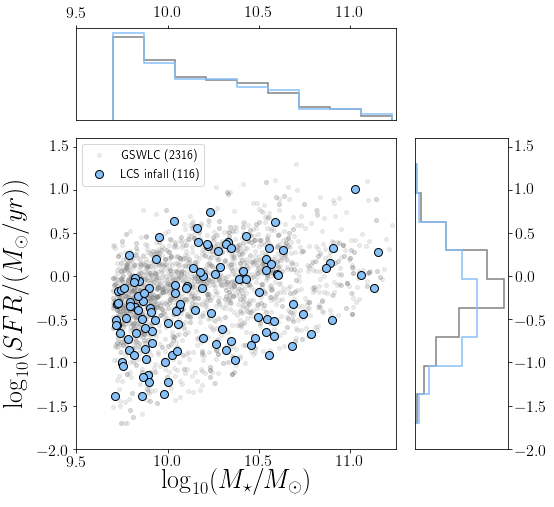

In [164]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
flag = ~b.lcs.cat['membflag'] & (b.lcs.cat['DELTA_V'] < 3.)
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-massmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-massmatch.png'
b.plot_sfr_mstar(lcsflag=flag,lcsinfall=True,label='LCS infall',outfile1=outfile1,outfile2=outfile2,coreflag=False,massmatch=True)

### SFR-M*: LCS core vs infall, no BT cut ###

* stellar masses are not diff 
* SFRs are not different

**again, need mass-matched sample**

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
number in core sample =  153
number in external sample =  116
just checking ... 153 116
9.702
9.711
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.08
p-vale = 6.880e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.17
p-vale = 3.007e-02 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

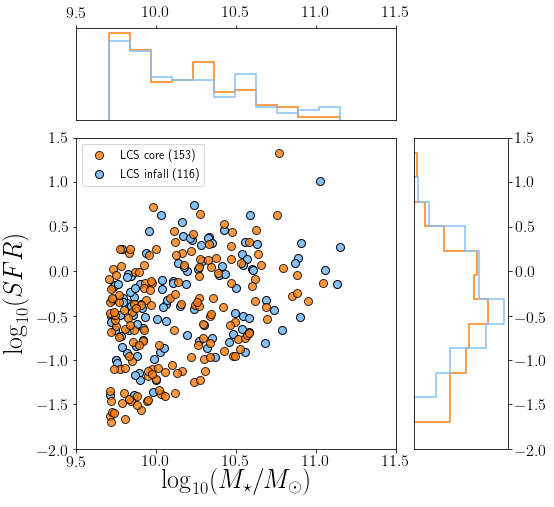

In [165]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
outfile1 = homedir+'/research/LCS/plots/lcscore-external-sfrmstar.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-external-sfrmstar.png'
b.plot_sfr_mstar_lcs(outfile1=outfile1,outfile2=outfile2,nbins=10)

# SFR- Mstar with B/T < 0.3 #

### SFR-M*: LCS infall vs GSWLC, with BT cut ###


* SFRs are not different
* stellar masses are very diff (more low-mass galaxies in gswlc)

**again, need mass-matched sample**

* make a cumulative histogram of core masses
* draw a random number [0,1]
* determine mass that corresponds to that point on cumulative histogram
* then select GSWLC galaxy with comparable mass
* how to avoid selecting the same galaxy multiple times?
  * pick closest galaxy that hasn't already been picked
* verify 

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550
number in lcs sample =  72
number in gsw sample =  9237
just checking ... 9230 72
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.10
p-vale = 4.580e-01 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   0.27
p-vale = 0.26218 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.23
p-vale = 7.621e-04 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   8.31
p-vale = 0.00035 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

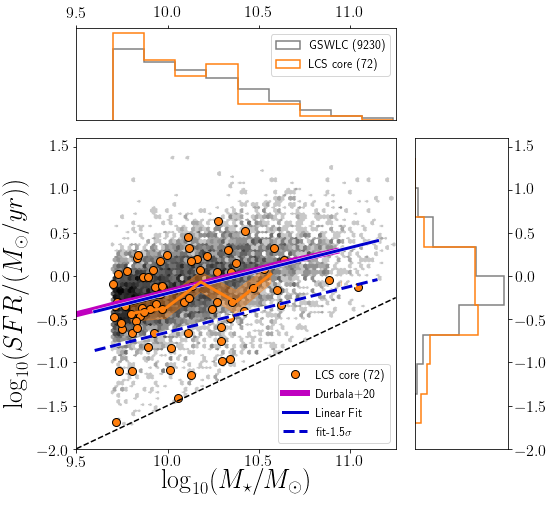

In [82]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
flag = b.lcs.cat['membflag'] 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut.png'
b.plot_sfr_mstar(lcsflag=flag,lcsmemb=True,outfile1=outfile1,outfile2=outfile2,massmatch=False,hexbinflag=True)

### LCS core vs GSWLC with B/T cut and mass match ###

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
543 543 543 543
number in lcs sample =  71
number in gsw sample =  9088
just checking ... 1420 71
9.701
9.702
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.06
p-vale = 9.581e-01 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =  -0.90
p-vale = 0.90824 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.20
p-vale = 6.076e-03 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =   5.10
p-vale = 0.00334 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

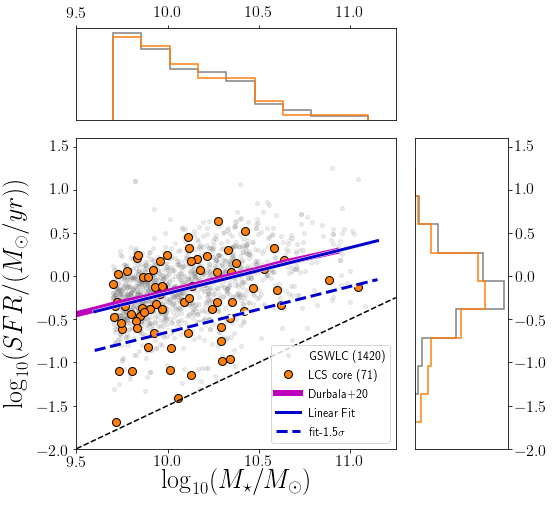

In [232]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
flag = b.lcs.cat['membflag'] 
outfile1 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut-massmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-gsw-sfrmstar-BTcut-massmatch.png'
b.plot_sfr_mstar(lcsflag=flag,lcsmemb=True,outfile1=outfile1,outfile2=outfile2,massmatch=True,hexbinflag=False)

### SFR-M* :  LCS infall vs GSWLC - with BT cut ###

* SFRs are marginally different
* stellar masses are indistinguisable


outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550
number in lcs sample =  66
number in gsw sample =  9237
just checking ... 9230 66
9.701
9.715
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.11
p-vale = 3.532e-01 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =  -0.41
p-vale = 0.53444 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.10
p-vale = 4.672e-01 (prob that samples are from same distribution)
Anderson-Darling test Test:
D =  -0.47
p-vale = 0.57158 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

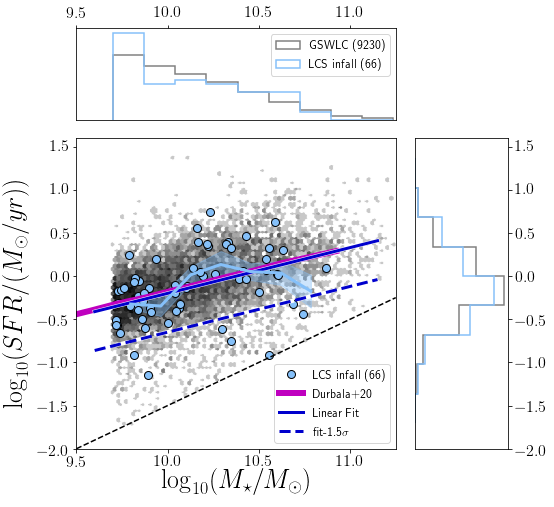

In [83]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
flag = ~b.lcs.cat['membflag'] & (b.lcs.cat['DELTA_V'] < 3.)
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut.png'
b.plot_sfr_mstar(lcsflag=flag,label='LCS infall',lcsmemb=True,outfile1=outfile1,outfile2=outfile2,coreflag=False,hexbinflag=True,massmatch=False)

### LCS infall vs GSWLC, with B/T and mass match ###

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
number in lcs sample =  66
number in gsw sample =  2877
just checking ... 1320 66
9.701
9.715
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.06
p-vale = 9.725e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.12
p-vale = 2.791e-01 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

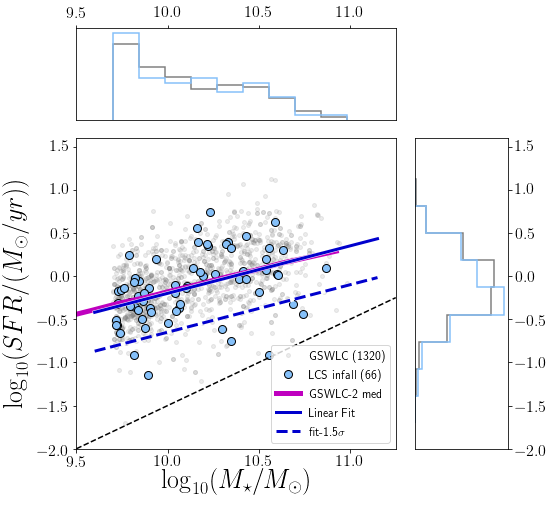

In [44]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
flag = ~b.lcs.cat['membflag'] & (b.lcs.cat['DELTA_V'] < 3.)
outfile1 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut-massmatch.pdf'
outfile2 = homedir+'/research/LCS/plots/lcsinfall-gsw-sfrmstar-BTcut-massmatch.png'
b.plot_sfr_mstar(lcsflag=flag,label='LCS infall',lcsinfall=True,outfile1=outfile1,outfile2=outfile2,coreflag=False,hexbinflag=False,massmatch=True)

### SFR - M*: LCS core vs infall, with B/T cut ###

* masses and SFRs are the same

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-2020Nov11-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
number in core sample =  71
number in external sample =  66
just checking ... 71 66
9.702
9.715
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.10
p-vale = 8.039e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.15
p-vale = 3.596e-01 (prob that samples are from same distribution)


<Figure size 489.6x360 with 0 Axes>

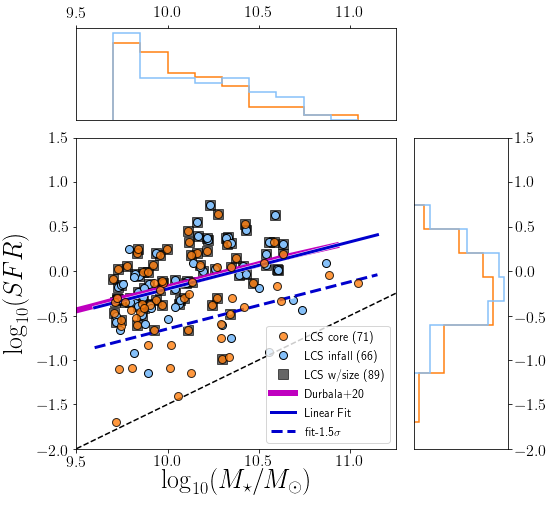

In [108]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
outfile1 = homedir+'/research/LCS/plots/lcscore-external-sfrmstar-BTcut.pdf'
outfile2 = homedir+'/research/LCS/plots/lcscore-external-sfrmstar-BTcut.png'
b.plot_sfr_mstar_lcs(outfile1=outfile1,outfile2=outfile2,nbins=10)

# Plot dSFR hist #

outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-tab3-Tempel-13-2021Jan07-LCS-Zoverlap-BTcut.fits
got sb flag
550 550 550 550
KS STATISTICS: FIELD VS CORE
Ks_2sampResult(statistic=0.2144410162029519, pvalue=0.002309979706769827)
Anderson_ksampResult(statistic=8.306333638593118, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

KS STATISTICS: FIELD VS INFALL
Ks_2sampResult(statistic=0.06771679116596298, pvalue=0.9044839324654173)
Anderson_ksampResult(statistic=-0.8353976576061465, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.25)

KS STATISTICS: CORE VS INFALL
Ks_2sampResult(statistic=0.20833333333333334, pvalue=0.08469501265081014)
Anderson_ksampResult(statistic=1.3230093240180867, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.09256813382827882)


<Figure size 489.6x360 with 0 Axes>

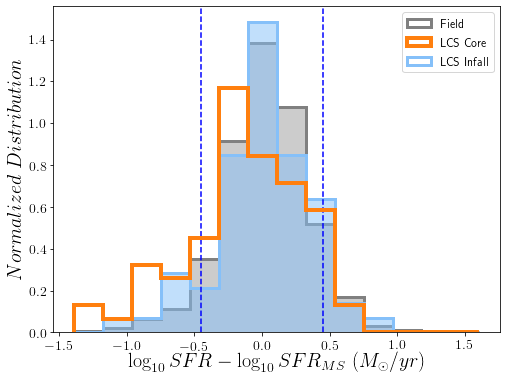

In [76]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
outfile1 = homedir+'/research/LCS/plots/delta-sfr-hist.pdf'
outfile2 = homedir+'/research/LCS/plots/delta-sfr-hist.png'
b.plot_dsfr_hist(outfile1=outfile1,outfile2=outfile2)

# Plot LIR vs GSWLC SFR

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
543 543 543 543


<Figure size 489.6x360 with 0 Axes>

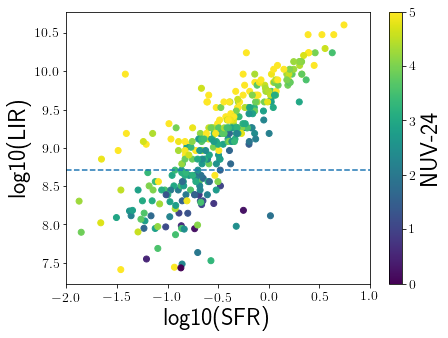

In [127]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
plt.figure()
plt.scatter(b.lcs.cat['logSFR'],np.log10(b.lcs.cat['LIR_ZDIST']),c=b.lcs.NUV24,vmin=0,vmax=5)
plt.colorbar(label='NUV-24')
plt.xlim(-2,1)
plt.xlabel('log10(SFR)')
plt.ylabel('log10(LIR)')
plt.axhline(y=np.log10(5.2e8),ls='--')

# Sample Statistics

number with sfr and size measurements for core and infall

In [230]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
print('number of core galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.membflag & b.lcs.sampleflag))
print('number of core galaxies = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag))
print('\t with size measurements = ',sum(b.lcs_mass_sfr_flag & b.lcs.infallflag & b.lcs.sampleflag))
print('number of GSW galaxies = ',sum(b.gsw_mass_sfr_flag) )

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
543 543 543 543
number of core galaxies =  73
	 with size measurements =  58
number of core galaxies =  64
	 with size measurements =  50
number of GSW galaxies =  9088


# $\Delta$ SFR and HI Deficiency

* cross-matched our LCS catalog with A100 - 94 matches
* can calculate HI def from Petro r 90 
  * correct radius according to https://www.aanda.org/articles/aa/full_html/2013/12/aa21326-13/aa21326-13.html
  * this says $D_{25} = 1.58 D_{SDSS}$, where $D_{SDSS}$ is the 90 Petrosian R-band
* scaling relation for HI mass and D25 for AMIGA galaxies is here: https://www.aanda.org/articles/aa/full_html/2018/01/aa31448-17/aa31448-17.html
  * gradient = 0.86 ± 0.04 	
  * intercept = 7.32 ± 0.13
  * logMHI = a + b* 2 logD25_kpc


got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-12.5-2020Nov11-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
just checking ... 15 12
0.042752266
-0.027439117
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.43
p-vale = 1.263e-01 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.35
p-vale = 3.142e-01 (prob that samples are from same distribution)
SpearmanrResult(correlation=0.17835212246109816, pvalue=0.3287516451016239)


<Figure size 489.6x360 with 0 Axes>

<Figure size 489.6x360 with 0 Axes>

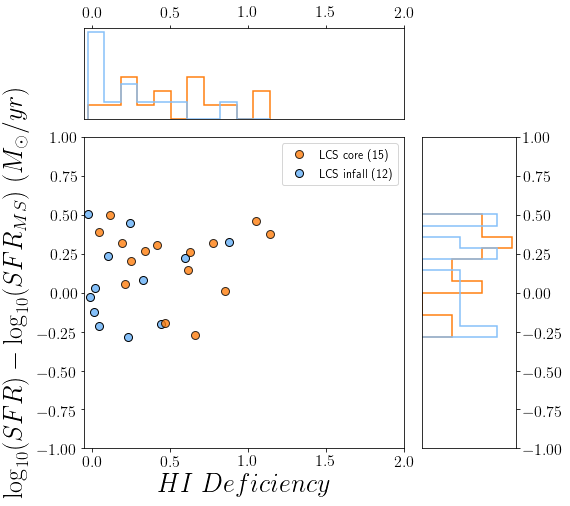

In [91]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9
outfile1 = homedir+'/research/LCS/plots/delta-sfr-HIdef.pdf'
outfile2 = homedir+'/research/LCS/plots/delta-sfr-HIdef.png'
b.plot_dsfr_HIdef(outfile1=outfile1,outfile2=outfile2)

# Summary Statistics

* running mass, SFR and sSFR comparisons all at once to help with creating tables

In [259]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
b.ks_stats()

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
543 543 543 543
########################################
LCS Core vs Field: SFR
	D = 2.53e-01, pvalue = 1.47e-04
LCS Core vs Field: dSFR
	D = 2.09e-01, pvalue = 2.89e-03
LCS Core vs Field: Mstar
	D = 8.09e-02, pvalue = 6.99e-01
########################################
LCS Infall vs Field: SFR
	D = 6.88e-02, pvalue = 9.05e-01
LCS Infall vs Field: dSFR
	D = 7.34e-02, pvalue = 8.59e-01
LCS Infall vs Field: Mstar
	D = 1.24e-01, pvalue = 2.61e-01
########################################
LCS Core vs Infall: SFR
	D = 2.06e-01, pvalue = 9.25e-02
LCS Core vs Infall: dSFR
	D = 1.96e-01, pvalue = 1.22e-01
LCS Core vs Infall: Mstar
	D = 9.31e-02, pvalue = 8.92e-01


In [260]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --cutBT --minmass 9.7
b.ks_stats(massmatch=True)

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap-BTcut.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
543 543 543 543
########################################
LCS Core vs Field: SFR
	D = 2.34e-01, pvalue = 8.25e-04
LCS Core vs Field: dSFR
	D = 2.05e-01, pvalue = 4.81e-03
LCS Core vs Field: Mstar
	D = 8.77e-02, pvalue = 6.30e-01
########################################
LCS Infall vs Field: SFR
	D = 5.55e-02, pvalue = 9.87e-01
LCS Infall vs Field: dSFR
	D = 7.27e-02, pvalue = 8.84e-01
LCS Infall vs Field: Mstar
	D = 5.86e-02, pvalue = 9.78e-01


### Without B/T Cut

In [261]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
b.ks_stats()

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
1376 1376 1376 1376
########################################
LCS Core vs Field: SFR
	D = 3.10e-01, pvalue = 2.50e-13
LCS Core vs Field: dSFR
	D = 3.10e-01, pvalue = 2.48e-13
LCS Core vs Field: Mstar
	D = 1.06e-01, pvalue = 6.21e-02
########################################
LCS Infall vs Field: SFR
	D = 1.78e-01, pvalue = 1.71e-03
LCS Infall vs Field: dSFR
	D = 1.58e-01, pvalue = 7.18e-03
LCS Infall vs Field: Mstar
	D = 8.48e-02, pvalue = 3.96e-01
########################################
LCS Core vs Infall: SFR
	D = 1.78e-01, pvalue = 2.64e-02
LCS Core vs Infall: dSFR
	D = 2.09e-01, pvalue = 5.49e-03
LCS Core vs Infall: Mstar
	D = 7.17e-02, pvalue = 8.57e-01


In [262]:
os.chdir(homedir+'/research/LCS/plots/')
%run ~/github/LCS/python/Python3/lcs_paper2.py --minmass 9.7
b.ks_stats(massmatch=True)

got a fits file
outfile =  /home/rfinn/research/GSWLC/GSWLC-X2-NO-DR10-AGN-Simard2011-tab1-Tempel-13-2020Nov25-LCS-Zoverlap.fits
0.0137 0.0433
0.0137 0.0433
got sb flag
1376 1376 1376 1376
########################################
LCS Core vs Field: SFR
	D = 2.95e-01, pvalue = 6.35e-12
LCS Core vs Field: dSFR
	D = 3.13e-01, pvalue = 1.93e-13
LCS Core vs Field: Mstar
	D = 6.22e-02, pvalue = 5.94e-01
########################################
LCS Infall vs Field: SFR
	D = 1.73e-01, pvalue = 2.79e-03
LCS Infall vs Field: dSFR
	D = 1.58e-01, pvalue = 8.31e-03
LCS Infall vs Field: Mstar
	D = 4.91e-02, pvalue = 9.47e-01
